/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

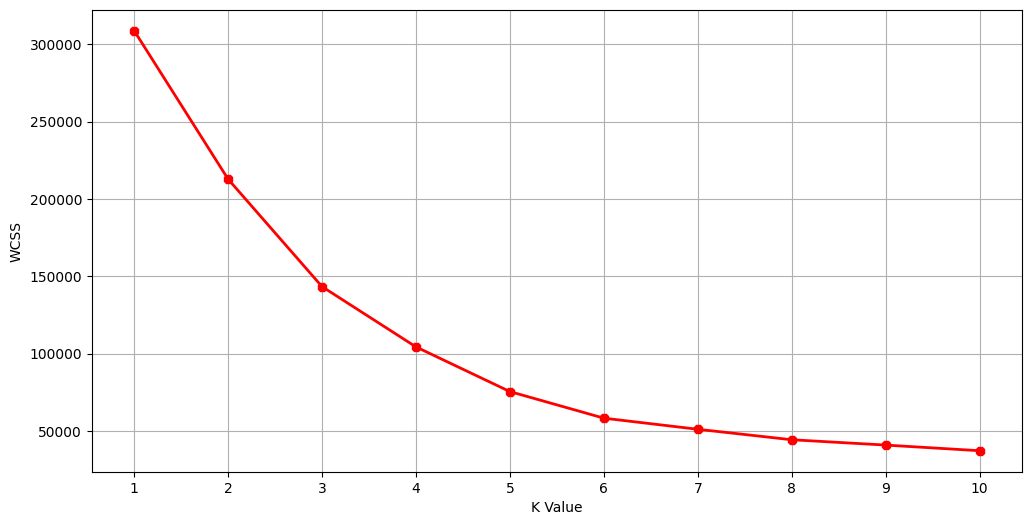

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


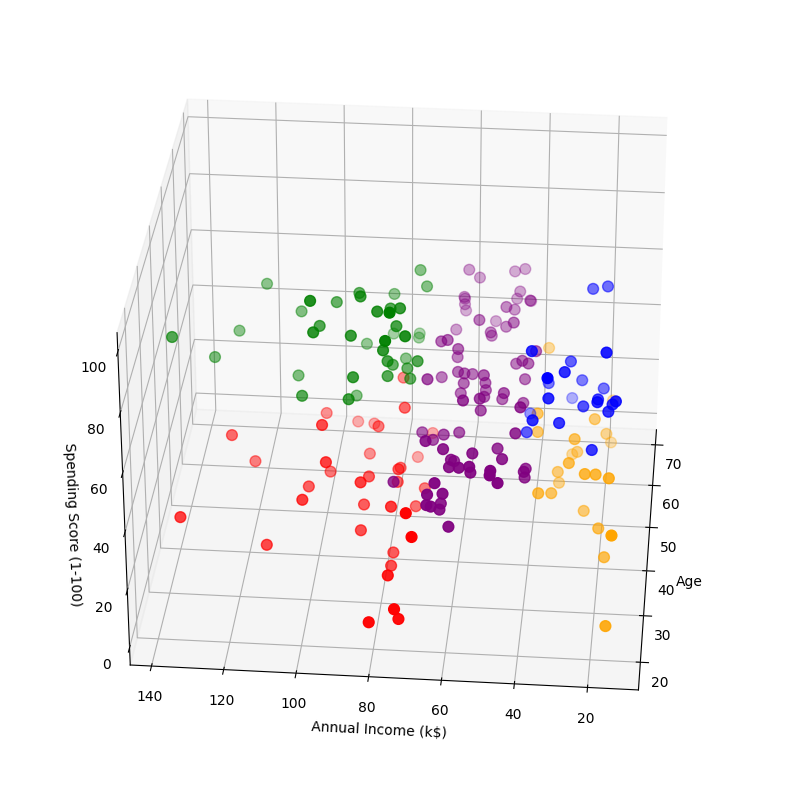

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")
df.head()

df.drop(["CustomerID"], axis = 1, inplace=True)



from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()





In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import joblib
joblib.dump(km ,"kmeans_model.pk1")

['kmeans_model.pk1']

In [23]:

df.drop(["Gender"], axis = 1, inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


In [24]:
from sklearn.model_selection import train_test_split
x=df.drop(["label"],axis=1)
y=df[["label"]]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
x_train

,Age,Annual Income (k$),Spending Score (1-100)
176,58,88,15
98,48,61,42
80,57,54,51
69,32,48,47
171,28,87,75
...,...,...,...
91,18,59,41
96,47,60,47
133,31,72,71
183,29,98,88


In [26]:
x_test

,Age,Annual Income (k$),Spending Score (1-100)
198,32,137,18
168,36,87,27
164,50,85,26
78,23,54,52
148,34,78,22
160,56,79,35
94,32,60,42
199,30,137,83
115,19,65,50
141,32,75,93


In [29]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
import pickle
filename="model.sav"
pickle.dump(clf,open(filename,"wb"))

#load model
loaded_model=pickle.load(open(filename,"rb"))
result=loaded_model.score(x_test,y_pred)
print(result*100,"%")


100.0 %
